In [27]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

filename = "/content/Advertising.csv"

df = pd.read_csv(filename)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [29]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [30]:
#cleaning data
#checking for null values
missing_values = df.isna().sum()
print(missing_values)

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [31]:
#checking for duplicate values
duplicate_values = df.duplicated().sum()
print(duplicate_values)

0


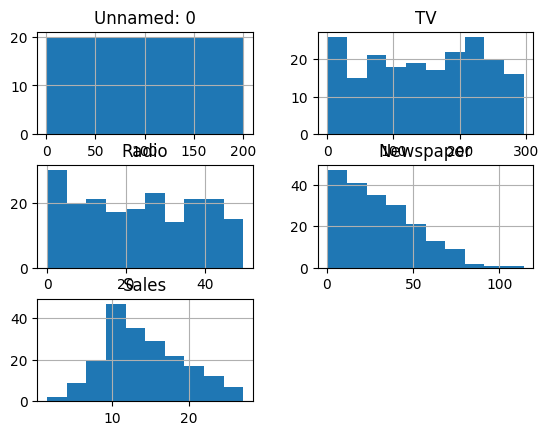

In [35]:
#plotting a histogram
df.hist()
plt.show()

In [33]:
#checking correlation of target variable with all variables
corr_matrix = df.corr()["Sales"]
print(corr_matrix.sort_values(ascending=False))

Sales         1.000000
TV            0.782224
Radio         0.576223
Newspaper     0.228299
Unnamed: 0   -0.051616
Name: Sales, dtype: float64


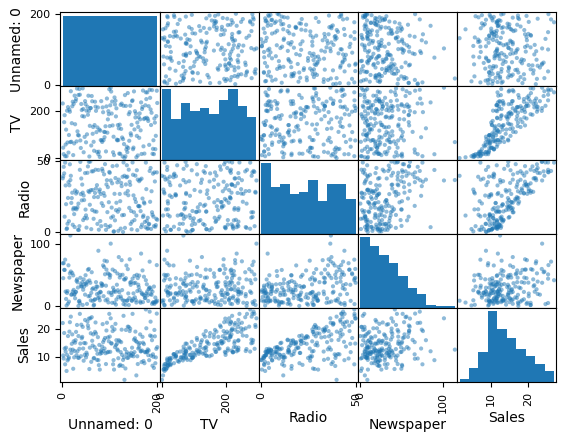

In [34]:
scatter_matrix(df)
plt.show()

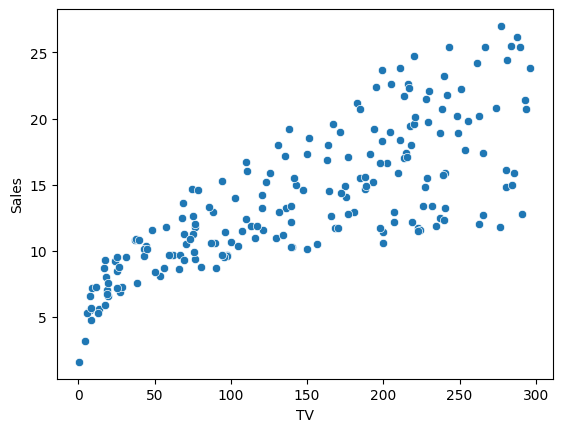

In [36]:
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

In [37]:
#splitting data
X=df.drop("Sales", axis=1)
y=df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
#building Linear Regression model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [39]:
#predicting

y_pred = model.predict(X_test)
print(y_pred)

[10.24664397  7.3067958   7.01313011 24.0629912  11.84538583  6.3623126
 12.97367539 15.01392577 10.95137181 16.2302401  22.94764396  9.07892877
 10.29830431 15.372556   11.63358138 12.38729183 18.91996453 10.72601207
 16.03372676 17.36589369 23.85225051  9.51048184 15.25366204 12.2528663
  5.81346738 15.19998588 12.12398331 20.74762723 13.36651757  9.16548788
 13.0430809  21.47977498 18.01828076 21.14170908  6.74096317  5.9527019
  7.82515133 13.21661502 14.72150697  6.18172688]


In [40]:
#R squared
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.8564802143279248


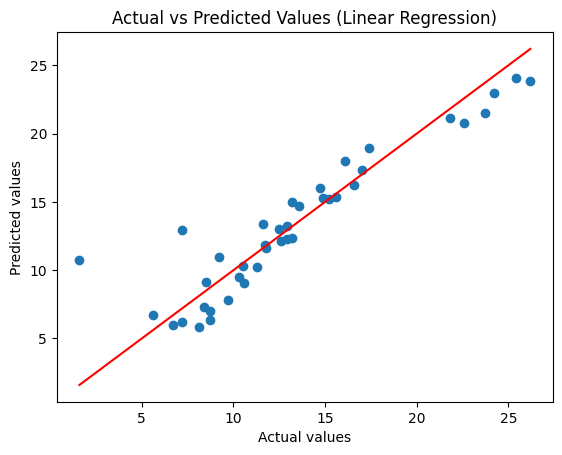

In [41]:
#plotting predicted values against actual values
plt.scatter(y_test,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values (Linear Regression)")

# Plot a line of best fit
x = [min(y_test), max(y_test)]
y = [min(y_test), max(y_test)]
plt.plot(x, y, 'r')
plt.show()

**Inference**  
R2 Score: 0.8564802143279248